In [8]:
!pip install xgboost scikit-learn

import os
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

In [9]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = "/content/drive/MyDrive/CSI"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
def process_csv(filepath):
    df = pd.read_csv(filepath)
    amp = extract_amplitude_features(df)
    if amp.size == 0:
        raise ValueError("Amplitude array is empty")
    feature_vector = np.concatenate([
        amp.mean(axis=0),
        amp.std(axis=0),
        np.max(amp, axis=0),
        np.min(amp, axis=0)
    ])
    return feature_vector


In [11]:
# 복소수 CSI → 진폭 변환 함수
def extract_amplitude_features(df):
    amplitude_matrix = []
    for col in df.columns:
        if re.match(r'^_\d+$', col):  # _0 ~ _63
            cleaned = []
            for val in df[col].dropna():
                try:
                    c = complex(str(val).replace("(", "").replace(")", "").replace(" ", "").replace("nan", "0"))
                    cleaned.append(abs(c))
                except Exception:
                    cleaned.append(np.nan)
            amplitude_matrix.append(np.array(cleaned))
    result = np.array(amplitude_matrix).T if amplitude_matrix else np.array([])
    return result

In [12]:
# 단일 CSV → 통계 기반 벡터
def load_flat_dataset(folder_path):
    X, y = [], []
    label_map = {}
    files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith('.csv')])
    print(f"CSV 파일 수: {len(files)}")

    for file in files:
        class_name = "_".join(file.split("_")[:3])  # 예: hands_up_bath
        if class_name not in label_map:
            label_map[class_name] = len(label_map)
        label = label_map[class_name]

        file_path = os.path.join(folder_path, file)
        try:
            features = process_csv(file_path)
            X.append(features)
            y.append(label)
            print(f"{file} → 라벨 {label}")
        except Exception as e:
            print(f"❌ 처리 실패: {file} | 에러: {e}")

    return np.array(X), np.array(y), label_map


In [14]:
from sklearn.model_selection import train_test_split

# 데이터 로딩
X, y, label_map = load_flat_dataset("/content/drive/MyDrive/CSI")

# 클래스 이름 정렬
class_names = [k for k, v in sorted(label_map.items(), key=lambda item: item[1])]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

CSV 파일 수: 80
hands_up_bath_1.csv → 라벨 0
hands_up_bath_10.csv → 라벨 0
hands_up_bath_11.csv → 라벨 0
hands_up_bath_12.csv → 라벨 0
hands_up_bath_13.csv → 라벨 0
hands_up_bath_14.csv → 라벨 0
hands_up_bath_15.csv → 라벨 0
hands_up_bath_16.csv → 라벨 0
hands_up_bath_17.csv → 라벨 0
hands_up_bath_18.csv → 라벨 0
hands_up_bath_19.csv → 라벨 0
hands_up_bath_2.csv → 라벨 0
hands_up_bath_20.csv → 라벨 0
hands_up_bath_3.csv → 라벨 0
hands_up_bath_4.csv → 라벨 0
hands_up_bath_5.csv → 라벨 0
hands_up_bath_6.csv → 라벨 0
hands_up_bath_7.csv → 라벨 0
hands_up_bath_8.csv → 라벨 0
hands_up_bath_9.csv → 라벨 0
hands_up_bed_1.csv → 라벨 1
hands_up_bed_10.csv → 라벨 1
hands_up_bed_11.csv → 라벨 1
hands_up_bed_12.csv → 라벨 1
hands_up_bed_13.csv → 라벨 1
hands_up_bed_14.csv → 라벨 1
hands_up_bed_15.csv → 라벨 1
hands_up_bed_16.csv → 라벨 1
hands_up_bed_17.csv → 라벨 1
hands_up_bed_18.csv → 라벨 1
hands_up_bed_19.csv → 라벨 1
hands_up_bed_2.csv → 라벨 1
hands_up_bed_20.csv → 라벨 1
hands_up_bed_3.csv → 라벨 1
hands_up_bed_4.csv → 라벨 1
hands_up_bed_5.csv → 라벨 1
hands_up_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (64,), 'mlp__solver': 'adam'}

[Train Classification Report]
                  precision    recall  f1-score   support

  hands_up_bath       1.00      1.00      1.00        16
   hands_up_bed       1.00      1.00      1.00        16
wave_hands_bath       1.00      1.00      1.00        16
 wave_hands_bed       1.00      1.00      1.00        16

       accuracy                           1.00        64
      macro avg       1.00      1.00      1.00        64
   weighted avg       1.00      1.00      1.00        64


Test Classification Report]
                  precision    recall  f1-score   support

  hands_up_bath       1.00      0.75      0.86         4
   hands_up_bed       0.67      1.00      0.80         4
wave_hands_bath       1.00      1.00      1.00         4
 wave_hands_bed       1.00      0.75      0.86         4

       

<Figure size 600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47148 (\N{HANGUL SYLLABLE RYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


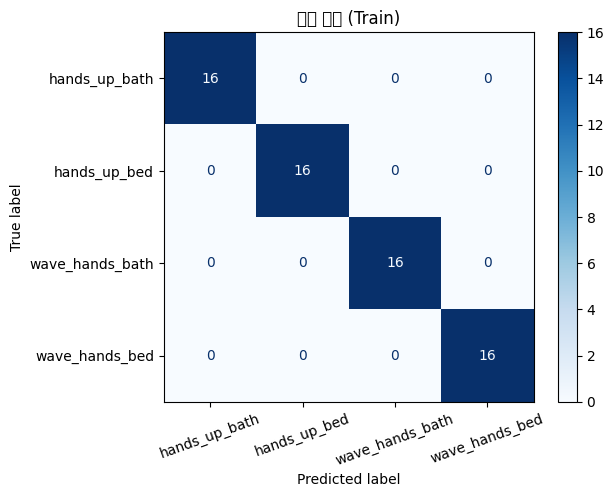

<Figure size 600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47148 (\N{HANGUL SYLLABLE RYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


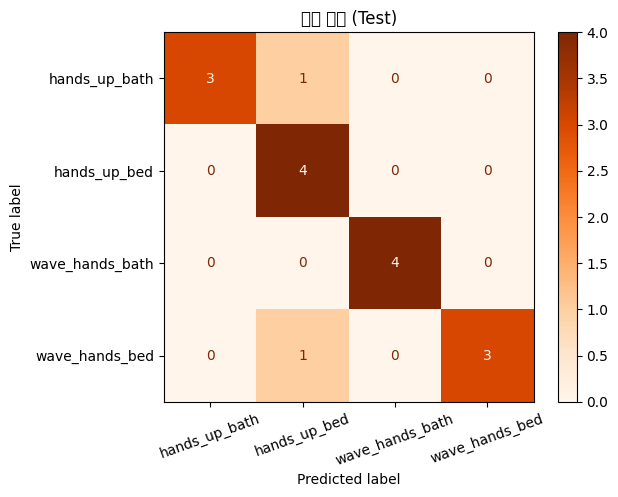

Train Accuracy: 1.0000
Test Accuracy:  0.8750


In [17]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# 1. 학습/테스트 데이터 분할 (이미 X, y가 있다고 가정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2. 파이프라인 정의
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=500, random_state=42))
])

# 3. 하이퍼파라미터 그리드 정의
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128,), (100, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__solver': ['adam']
}

# 4. GridSearchCV로 최적 모델 탐색
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

# 5. 최적 파라미터 출력
print("Best Parameters:", grid.best_params_)

# 6. 예측
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

# 7. classification_report 출력
train_report = classification_report(y_train, y_train_pred, target_names=class_names)
test_report = classification_report(y_test, y_test_pred, target_names=class_names)

print("\n[Train Classification Report]\n", train_report)
print("\nTest Classification Report]\n", test_report)

# 8. 혼동 행렬 (Train)
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)
plt.figure(figsize=(6, 6))
disp_train.plot(cmap='Blues', values_format='d')
plt.title("혼동 행렬 (Train)")
plt.xticks(rotation=20)
plt.show()

# 9. 혼동 행렬 (Test)
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)
plt.figure(figsize=(6, 6))
disp_test.plot(cmap='Oranges', values_format='d')
plt.title("혼동 행렬 (Test)")
plt.xticks(rotation=20)
plt.show()

# 10. 정확도
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:  {test_accuracy:.4f}")
